In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import norm

(array([1.4000e+01, 5.1200e+03, 5.0238e+04, 4.1054e+04, 3.5320e+03,
        4.1000e+01, 0.0000e+00]),
 array([ 0., 10., 20., 30., 40., 50., 60., 70.]),
 <BarContainer object of 7 artists>)

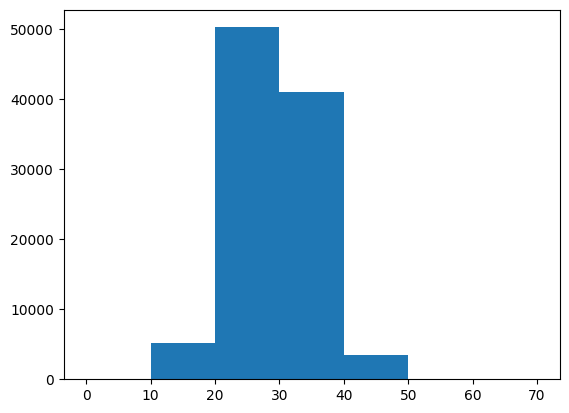

In [73]:
df = pd.read_excel('/content/drive/MyDrive/DC_Folder/with 2 ND FIKTER  HENE OFF.xlsx',  names=['y','x'])
df.head()
sample=df
np_X=np.array(sample['x'])
plt.hist(np_X,bins=[0,10,20,30,40,50,60,70])

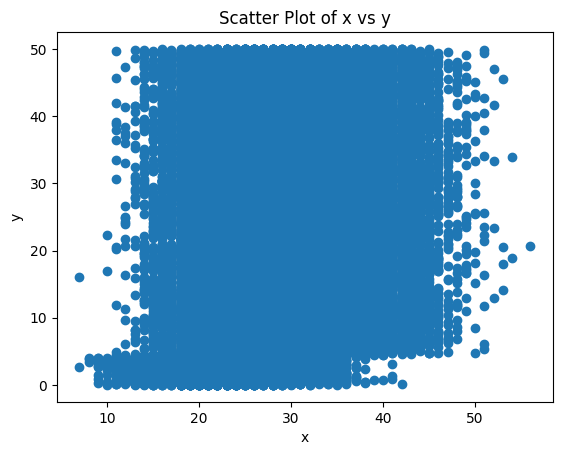

In [74]:
plt.scatter(df['x'], df['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot of x vs y')
plt.show()

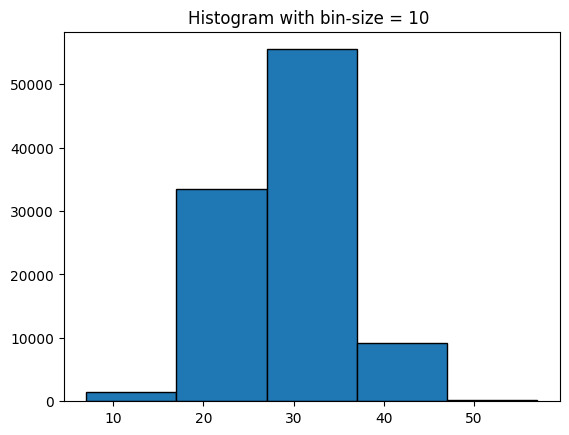

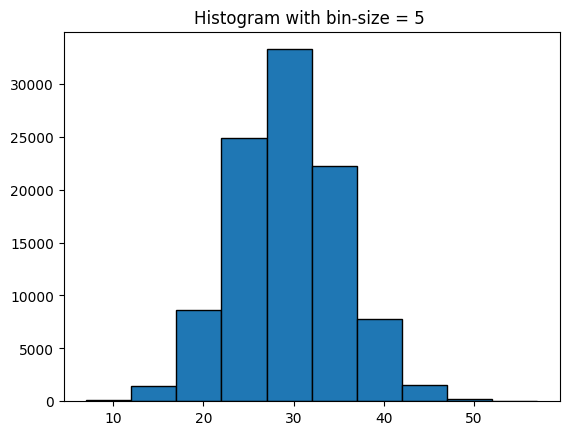

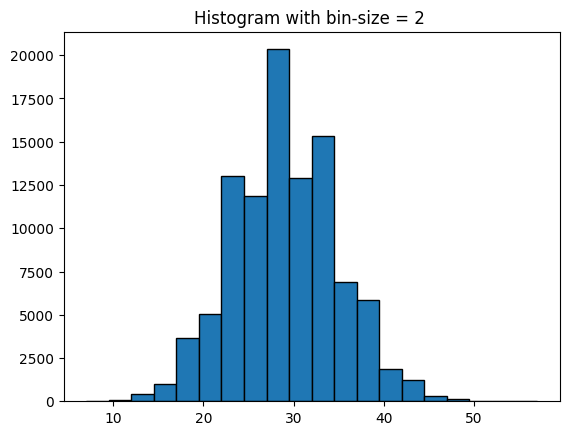

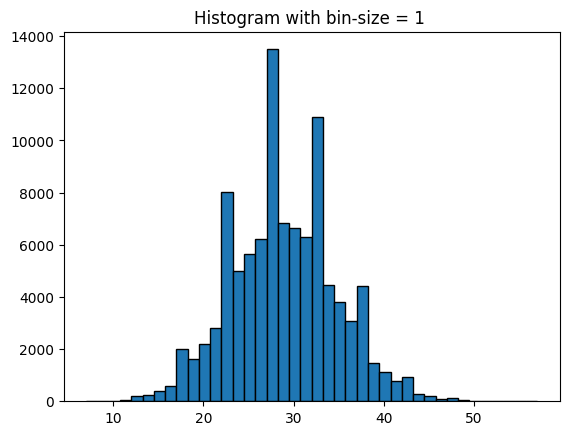

In [75]:
w=10.0
while(w>=1):
  plt.hist(np_X, edgecolor='black', bins=np.arange(min(np_X), max(np_X) + w, w))
  plt.title("Histogram with bin-size = %i " %w)
  plt.show()
  w=w/2

#Correlation Heatmap

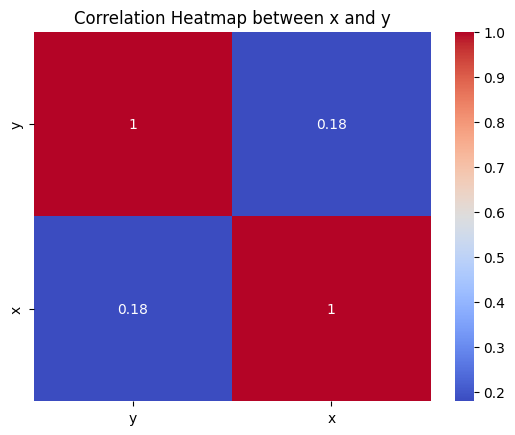

In [76]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap between x and y')
plt.show()

## Normalizing the data

In [77]:
# Import Standard Scaler from scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


In [78]:
X = np.array(sample['x'])
y = np.array(sample['y'])


In [79]:
# StandardScaler().fit_transform(X.reshape(-1,1))
X = StandardScaler().fit_transform(X.reshape(-1,1))
# from scipy.stats import norm
# import statistics
# # Calculating mean and standard deviation
# mean = statistics.mean(X)
# sd = statistics.stdev(X)

# plt.plot(X, norm.pdf(X, mean, sd))
# plt.show()

In [80]:
X = X.reshape(-1,1)

(array([1.4000e+01, 1.3400e+02, 7.5800e+02, 2.5920e+03, 6.6530e+03,
        1.3024e+04, 1.8477e+04, 2.0348e+04, 1.7174e+04, 1.1371e+04,
        5.8810e+03, 1.8790e+03, 1.2010e+03, 3.6800e+02, 9.9000e+01,
        2.3000e+01, 3.0000e+00]),
 array([-3.74848664, -3.24848664, -2.74848664, -2.24848664, -1.74848664,
        -1.24848664, -0.74848664, -0.24848664,  0.25151336,  0.75151336,
         1.25151336,  1.75151336,  2.25151336,  2.75151336,  3.25151336,
         3.75151336,  4.25151336,  4.75151336]),
 <BarContainer object of 17 artists>)

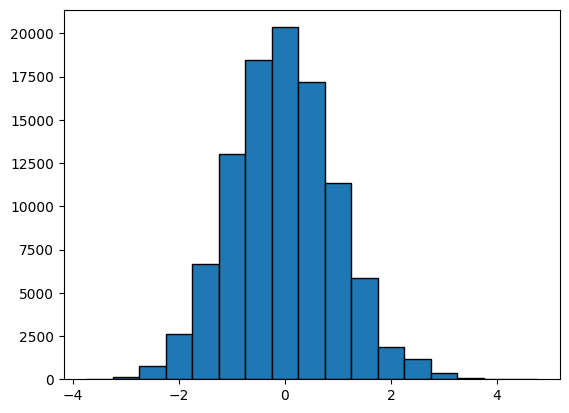

In [81]:
plt.hist(X, edgecolor='black', bins=np.arange(min(X), max(X) + 0.5, 0.5))

(array([1.4000e+01, 6.1000e+01, 4.4100e+02, 9.7400e+02, 3.6440e+03,
        5.0170e+03, 1.3024e+04, 1.1854e+04, 2.0343e+04, 1.2921e+04,
        1.0881e+04, 1.1371e+04, 4.4260e+03, 3.3340e+03, 9.2900e+02,
        5.7000e+02, 1.2200e+02, 6.1000e+01, 9.0000e+00, 2.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
        1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45]),
 <BarContainer object of 29 artists>)

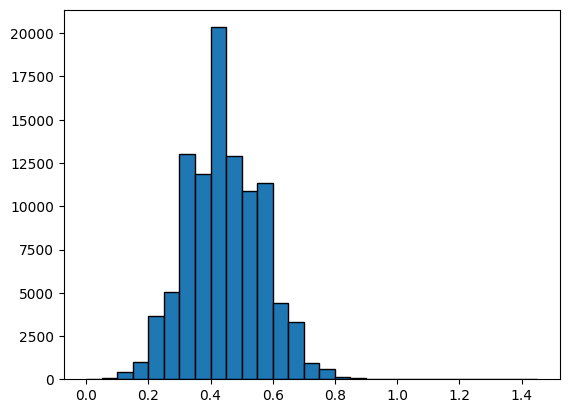

In [82]:
X = MinMaxScaler().fit_transform(X.reshape(-1,1))
plt.hist(X, edgecolor='black', bins=np.arange(min(X), max(X) + 0.5, 0.05))


#Density Plot

<ipython-input-83-77551ddd3449>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X, shade=True)
<ipython-input-83-77551ddd3449>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y, shade=True)


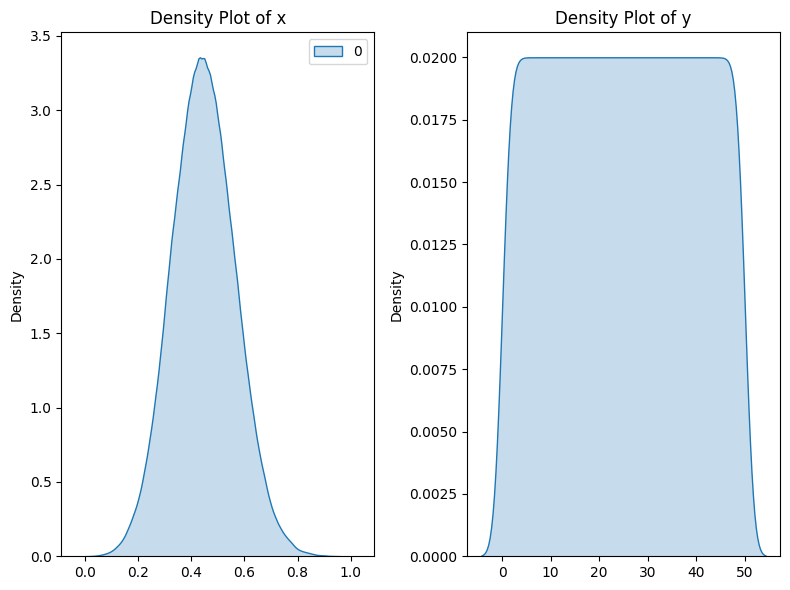

In [83]:
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
sns.kdeplot(X, shade=True)
plt.title('Density Plot of x')

plt.subplot(1, 2, 2)
sns.kdeplot(y, shade=True)
plt.title('Density Plot of y')

plt.tight_layout()
plt.show()

#QQ Plot

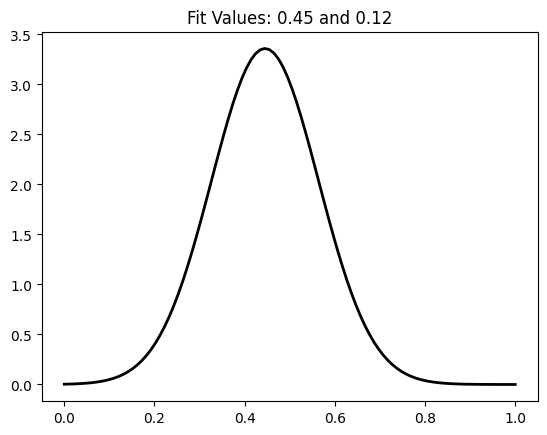

In [84]:
mu, std = norm.fit(X)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit Values: {:.2f} and {:.2f}".format(mu, std)
plt.title(title)
plt.show()

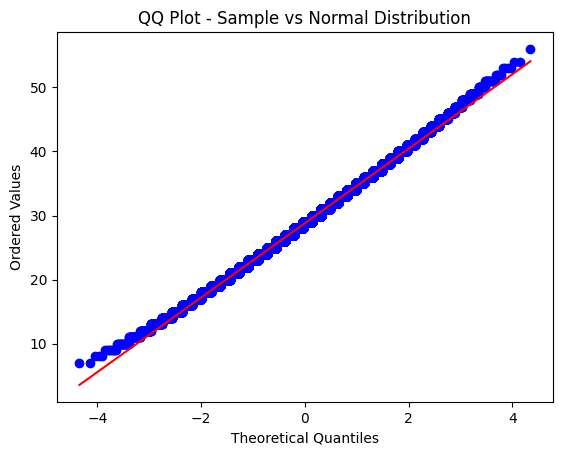

In [85]:
data = sample['x']

stats.probplot(data, dist="norm", plot=plt)
plt.title("QQ Plot - Sample vs Normal Distribution")
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.show()